<a href="https://colab.research.google.com/github/Glenn-Matias/fake_news_classifier/blob/main/MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
print(tf.__version__)
!pip3 install advertools
import advertools as adv
from collections import Counter
import string


2.6.0


In [14]:
!wget --no-check-certificate \
    https://s3.us-east-2.amazonaws.com/blaisecruz.com/datasets/fakenews/fakenews.zip
!unzip "/content/fakenews.zip" -d "/content/fakenews"

--2021-09-18 17:19:50--  https://s3.us-east-2.amazonaws.com/blaisecruz.com/datasets/fakenews/fakenews.zip
Resolving s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)... 52.219.105.193
Connecting to s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)|52.219.105.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1313458 (1.3M) [application/zip]
Saving to: ‘fakenews.zip.1’

fakenews.zip.1      100%[===================>]   1.25M  7.42MB/s    in 0.2s    

2021-09-18 17:19:51 (7.42 MB/s) - ‘fakenews.zip.1’ saved [1313458/1313458]

Archive:  /content/fakenews.zip
replace /content/fakenews/fakenews/full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/fakenews/fakenews/full.csv  


In [15]:
data = pd.read_csv("./fakenews/fakenews/full.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3206 entries, 0 to 3205
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3206 non-null   int64 
 1   article  3206 non-null   object
dtypes: int64(1), object(1)
memory usage: 50.2+ KB


,label,article
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...


In [16]:
# Get counts for the raw text
data['total_words_raw'] = [len(x.split()) for x in data['article'].tolist()]

max_length = data['total_words_raw'].max()
print(max_length)


# Change case to lowercase
data['article'] = data['article'].str.lower()

# Remove the tagalog stop words
data['article_treated'] = data['article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (adv.stopwords['tagalog'])]))

# Remove symbols and punctuations 
# data['article_treated'] = data['article_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in string.punctuation]))


# remove special characters !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
def remove_special_characters(input_string):
    for punctuation in string.punctuation:
        input_string = input_string.replace(punctuation, '')
    return input_string

data['article_treated'] = data['article_treated'].apply(remove_special_characters)



# Get counts for the treated text
data['total_words_treated'] = [len(x.split()) for x in data['article_treated'].tolist()]


data.head()

1074


,label,article,total_words_raw,article_treated,total_words_treated
0,0,"ayon sa thewrap.com, naghain ng kaso si krupa,...",257,ayon thewrapcom naghain kaso si krupa 35 noong...,193
1,0,kilala rin ang singer sa pagkumpas ng kanyang ...,153,kilala rin singer pagkumpas kamay tuwing nagta...,115
2,0,"blantyre, malawi (ap) -- bumiyahe patungong ma...",52,blantyre malawi ap bumiyahe patungong malawi ...,40
3,0,"kasama sa programa ang pananalangin, bulaklak ...",65,kasama programa pananalangin bulaklak pagsindi...,42
4,0,linisin ang friendship department dahil dadala...,26,linisin friendship department dadalawin angel ...,19


In [17]:
##store headlines and labels in respective lists
news = list(data['article_treated'])
labels = list(data['label'])

In [18]:
from sklearn.model_selection import train_test_split
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(news, labels, test_size=0.20, random_state=33)

In [19]:
words = " ".join(training_sentences).split(' ')
training_set_vocabulary = len(Counter(words))
print(f"Vocabulary size: {training_set_vocabulary}")

Vocabulary size: 37914


In [21]:
##define tokenizing and padding parameters
# vocab_size = 10000 # should be the number of distinct words in the dataset
# max_length = 120 # should be the max length all the training set


max_length = data['total_words_treated'].max()

print(f"Max number of words in a text: {max_length}")


embedding_dim = 300
trunc_type='post' # drops the excess sequences at the end of the sequence
padding_type='post' # add zeroesto the end part of the sequence
oov_tok = "<OOV>"


Max number of words in a text: 685


In [22]:
tokenizer = Tokenizer(num_words=training_set_vocabulary, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

print(word_index) # show the tokenized words

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

{'<OOV>': 1, 'si': 2, 'the': 3, 'of': 4, 'and': 5, 'to': 6, 'naman': 7, 'kay': 8, 'ayon': 9, 'lang': 10, 'duterte': 11, 'daw': 12, 'noong': 13, 'a': 14, 'in': 15, 'rin': 16, 'nang': 17, 'is': 18, 'i': 19, 'ilang': 20, 'that': 21, 'source': 22, 'video': 23, 'umano': 24, 'yung': 25, 'for': 26, 'sinabi': 27, 'matapos': 28, 'pangulong': 29, 'po': 30, 'pilipinas': 31, 'we': 32, 'miss': 33, 'natin': 34, 'city': 35, 'media': 36, 'manila': 37, 'be': 38, 'catriona': 39, 'it': 40, 'wala': 41, 'mo': 42, 'you': 43, 'pangulo': 44, 'pahayag': 45, 'upang': 46, 'ito': 47, 'on': 48, 'this': 49, 'social': 50, 'pang': 51, 'bansa': 52, 'kababayan': 53, 'are': 54, 'not': 55, 'nasa': 56, 'kayo': 57, 'pageant': 58, 'police': 59, 'will': 60, 'sina': 61, 'national': 62, 'philippine': 63, 'dating': 64, 'so': 65, 'ba': 66, 'kasi': 67, 'mas': 68, 'presidente': 69, 'suspek': 70, '2018': 71, 'philippines': 72, 'rodrigo': 73, 'as': 74, 'ulat': 75, 'gobyerno': 76, 'yan': 77, 'gray': 78, 'naturang': 79, 'with': 80, 'p

In [23]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [36]:
tf.random.set_seed(69)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(training_set_vocabulary, embedding_dim, input_length=max_length),

    # Uncomment for LSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True)), # almost same as max_length cuz its gonna be the size of what u will bring per epoch
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)), # half of past layer
    # Uncomment for CNN
    # tf.keras.layers.Conv1D(filters=64, kernel_size=max_length, activation='relu'),
    # UNcomment for simple nn
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

##compile the model
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 685, 300)          11374200  
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 685, 1024)         3330048   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 512)               2623488   
_________________________________________________________________
dense_10 (Dense)             (None, 24)                12312     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 17,340,073
Trainable params: 17,340,073
Non-trainable params: 0
_________________________________________________________________


In [39]:
epochs = 10
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/10


KeyboardInterrupt: ignored

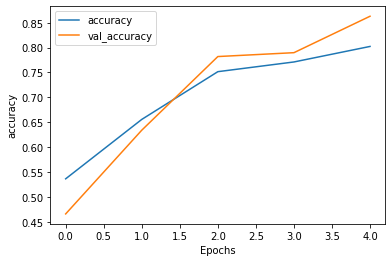

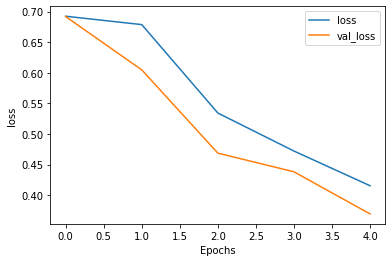

In [38]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [31]:
while 1:pass
def get_predictions(sentences):
  ##prepare the sequences of the sentences in question
  sequences = tokenizer.texts_to_sequences(sentence) # displays the sequences of words in encoded form
  padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  predictions_list = model.predict(padded_seqs)
  predictions_list = ['%f' % x for x in predictions_list]
  print(predictions_list)


In [32]:
sentence = [
            "Pilipinas, inuulan ng bagyo", 
            "Nilindol ang Batangas", 
            
            "Duterte, pinakamagaling na presidente. ayon sa ulat ni mocha uson", 
            "Talagang hindi natatakot si President Duterte sa mga Threats na kanyang natatanggap dahil malakas ang paniniwala niya sa ating Poong may Kapal. Kaya mahal na mahal namin kayo President",
            "Napaka fake news niyo ABS CBN .... galing niyo mag edit, tingnan niyo tunay na post ni MOCHA USON BLOG nandun yung tunay na post video hindi photo... nimal abs cbn madami na kayong naloloko na mga tangang tao",
            "Sobra Sobrang kahihiyan ang mga ginagawa ng mga PARI ngayon! Dapat sa mga PARING Rapist Maniac at Malilibog ay putulan ng TARUGO!",
            "Aquino nagalit dahil papalitan ang NAIA ng ‘Manila International Airport?",
            "Kinumpirma mismo ni Leni Robredo na siya ang Spotted sa Boston, 'Namumulot ng Basura'!",
            "Duterte, bagong presidente ng Pilipinas",
            "Inatake ng China ang Pilipinas."
            ]
sentence = [x.lower() for x in sentence]

get_predictions(sentence)




sentence = list(data[data['label']==1][0:10]['article'])

get_predictions(sentence)

sentence = list(data[data['label']==0][0:10]['article'])
get_predictions(sentence)




2021-09-18 17:32:14,556 | INFO | utils.py:157 | _init_num_threads | NumExpr defaulting to 2 threads.


['0.000447', '0.000100', '0.011226', '0.015222', '0.999932', '0.000370', '0.000094', '0.003509', '0.006748', '0.000482']
['0.999951', '0.999948', '0.999950', '0.999952', '0.999952', '0.999951', '0.999950', '0.999950', '0.999947', '0.999898']
['0.000069', '0.000088', '0.000051', '0.000028', '0.000077', '0.000027', '0.000433', '0.000322', '0.000106', '0.453353']


In [ ]:


# 30 epochs , 10,000 vocab, preserved case
# Rnn 
# ['0.221651', '0.000248', '0.000216', '0.020854', '1.000000', '0.000059', '0.004214', '0.001713']
# LSTM
# ['0.998617', '0.285047', '0.107714', '0.659346', '0.999892', '0.000024', '0.796265', '0.322125']
# Base line
# ['0.370136', '0.021366', '0.010388', '0.124484', '0.999182', '0.015307', '0.095852', '0.063588']


# 30 epochs, true number for vocab (lowercase distinct), preserved case
# Rnn 
# LSTM
# ['0.681796', '0.019023', '0.019576', '0.303410', '0.999965', '0.024431', '0.200263', '0.136963']
# Base line
# ['0.295957', '0.031743', '0.017272', '0.105267', '0.997630', '0.039485', '0.109363', '0.112274']


# 30 epochs, true number for vocab, lowercased
# Rnn 
# ['0.999986', '0.000020', '0.000011', '0.000119', '0.999989', '0.000027', '0.000045', '0.999985']
# LSTM
# ['0.517442', '0.007209', '0.005416', '0.133676', '0.999818', '0.006994', '0.028861', '0.043192']
# Base line
# ['0.423616', '0.064008', '0.036655', '0.191023', '0.998666', '0.067993', '0.210841', '0.169035']

# 30 epochs, true number for vocab, lowercased, exploded dataset per sentence
# Rnn 
# LSTM
# Base line
# ['1.000000', '0.417422', '0.353468', '1.000000', '1.000000', '1.000000', '0.999978', '0.999999'] <- any word containig duterte, ayaw

In [ ]:
list(data[data['label']==1][0:10]['article'])

['isiniwalat ng isang tribal leader ang kabalbalang pinaggagawa umano ng mga new people\'s army (npa) laban sa mga lumad. ayon sa panayam ng ptv sa nagpakilalang lumad lider, ginagahasa umano ng mga rebeldeng kumonista ang ilang mga lumad. ang iba naman ay pinapatay. kinakamkam din daw ng mga npa ang kanilang mga ari-arian. dahil sa pinaggagwa ng mga npa, magsasampa ang mga lumad lider laban sa mga bandidong komunista. "so, ang importante sa amin ngayon ,kailangan masampahan ang cpp-npa ng kaso. headed by jose maria sison. marami silang ginagawa. ang mga kabataan namin ay pinag-aaral sa hindi totoong paaralan. pangalawa, ang mga matatanda ay pinapatay pag hindi sumama sa kanila. pangatlo, ang mga kabataan namin ay may mga abusong ginagawa. pang-apat, ang aming ancestral domain, sila na ang nag-occupy. \'yung army at sunadlo na ng npa na ang nag-occupy. "sabi ng lumad lider. ikinagalit naman ng mga kababayan natin ang natuklasan nilang ginagawa ng mga npa. "sayang bakit naputol yong ved